# 🧠 Wprowadzenie do Sieci Neuronowych

## Od neuronu biologicznego do perceptronu

---

### 🔬 Neuron biologiczny - inspiracja z natury

**Jak działa neuron w mózgu?**

1. **Dendryty** (wejścia) - odbierają sygnały od innych neuronów
2. **Ciało komórki** - sumuje wszystkie sygnały
3. **Próg aktywacji** - jeśli suma przekroczy pewien próg, neuron "odpala"
4. **Akson** (wyjście) - przekazuje sygnał dalej
5. **Synapsy** - połączenia między neuronami (każde ma swoją "siłę")


---

### 🤖 Perceptron - sztuczny neuron (1957, Frank Rosenblatt)

**To matematyczny model neuronu biologicznego!**

Perceptron wykonuje następujące kroki:

**Krok 1: Pobierz wejścia**
- Otrzymujemy dane wejściowe: $x_1, x_2, ..., x_n$
- Każde wejście to jedna cecha obiektu

**Krok 2: Zastosuj wagi**
- Każde wejście jest mnożone przez wagę: $w_1, w_2, ..., w_n$
- **Wagi = siła połączeń** (jak synapsy w mózgu)
- Na początku wagi są **losowe**!

**Krok 3: Suma ważona**
$$z = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + b$$

gdzie $b$ = **bias** (próg aktywacji)

**Krok 4: Funkcja aktywacji**
$$\hat{y} = \begin{cases} 1 & \text{jeśli } z \geq 0 \\ 0 & \text{jeśli } z < 0 \end{cases}$$

---

### 🎯 Analogia: Neuron biologiczny ↔ Perceptron

| Neuron biologiczny | Perceptron | Znaczenie |
|-------------------|------------|-----------|
| Dendrytry | $x_1, x_2, ..., x_n$ | Dane wejściowe (cechy) |
| Synapsy | $w_1, w_2, ..., w_n$ | Wagi (siła połączeń) |
| Ciało komórki | $\sum w_i x_i + b$ | Agregacja sygnałów |
| Próg aktywacji | $\text{step}(z)$ | Funkcja aktywacji |
| Akson | $\hat{y}$ | Wyjście (predykcja) |

---

💡 **Kluczowa obserwacja:** 
> Perceptron może **nauczyć się** oddzielać dwie klasy, **dostosowując wagi**!
>
> To proces podobny do tego, jak mózg wzmacnia niektóre połączenia synaptyczne podczas uczenia się.



---

## 1️⃣ Prosty przykład - Klasyfikacja kwiatów Iris

### 🌸 Problem: Odróżnij dwa gatunki irysów

Użyjemy słynnego zbioru danych **Iris** (Ronald Fisher, 1936):
- **Iris setosa** (łatwy do odróżnienia)
- **Iris versicolor**

Każdy kwiat ma **2 cechy**:
- $x_1$ = długość płatka (petal length) [cm]
- $x_2$ = szerokość płatka (petal width) [cm]

**Zadanie:** Nauczyć perceptron, który na podstawie tych 2 cech powie, czy to setosa (0) czy versicolor (1).


🌸 ZBIÓR DANYCH IRIS - 2 GATUNKI

📊 Dane:
   Liczba przykładów: 100
   Klasa 0 (Setosa): 50 kwiatów
   Klasa 1 (Versicolor): 50 kwiatów
   Cechy: 2 (długość płatka, szerokość płatka)

📐 Przykładowe dane:
ID    x₁ (długość)    x₂ (szerokość)  Klasa      Gatunek        
------------------------------------------------------------
0     1.40            0.20            0          Setosa         
1     1.40            0.20            0          Setosa         
50    4.70            1.40            1          Versicolor     
51    4.50            1.50            1          Versicolor     


C:\Users\lest\AppData\Local\Temp\ipykernel_20668\731587479.py:51: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


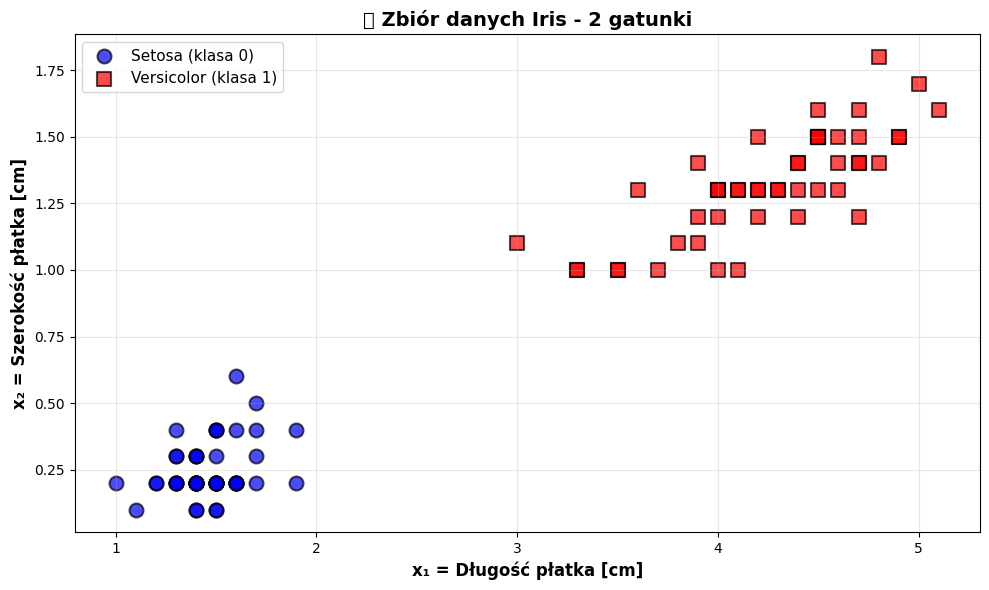


💡 OBSERWACJA:
   Klasy są **liniowo separowalne** - można je rozdzielić linią prostą!
   To idealny problem dla perceptronu.


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# === ZAŁADUJ DANE IRIS ===
iris = load_iris()
X = iris.data  # 4 cechy: sepal length, sepal width, petal length, petal width
y = iris.target  # 0=setosa, 1=versicolor, 2=virginica

# Wybierz tylko 2 pierwsze klasy (setosa i versicolor) i 2 cechy (petal length, petal width)
mask = y < 2  # Tylko setosa (0) i versicolor (1)
X_subset = X[mask, 2:]  # Kolumny 2 i 3 to petal length i width
y_subset = y[mask]

print("🌸 ZBIÓR DANYCH IRIS - 2 GATUNKI\n")
print("="*60)
print(f"📊 Dane:")
print(f"   Liczba przykładów: {len(y_subset)}")
print(f"   Klasa 0 (Setosa): {np.sum(y_subset == 0)} kwiatów")
print(f"   Klasa 1 (Versicolor): {np.sum(y_subset == 1)} kwiatów")
print(f"   Cechy: 2 (długość płatka, szerokość płatka)")

print(f"\n📐 Przykładowe dane:")
print(f"{'ID':<5} {'x₁ (długość)':<15} {'x₂ (szerokość)':<15} {'Klasa':<10} {'Gatunek':<15}")
print("-"*60)
for i in [0, 1, 50, 51]:
    species = "Setosa" if y_subset[i] == 0 else "Versicolor"
    print(f"{i:<5} {X_subset[i, 0]:<15.2f} {X_subset[i, 1]:<15.2f} {y_subset[i]:<10} {species:<15}")

# === WIZUALIZACJA DANYCH ===
plt.figure(figsize=(10, 6))

# Setosa (klasa 0)
setosa_mask = y_subset == 0
plt.scatter(X_subset[setosa_mask, 0], X_subset[setosa_mask, 1], 
           c='blue', marker='o', s=100, label='Setosa (klasa 0)', 
           edgecolors='black', linewidth=1.5, alpha=0.7)

# Versicolor (klasa 1)
versicolor_mask = y_subset == 1
plt.scatter(X_subset[versicolor_mask, 0], X_subset[versicolor_mask, 1], 
           c='red', marker='s', s=100, label='Versicolor (klasa 1)', 
           edgecolors='black', linewidth=1.5, alpha=0.7)

plt.xlabel('x₁ = Długość płatka [cm]', fontsize=12, fontweight='bold')
plt.ylabel('x₂ = Szerokość płatka [cm]', fontsize=12, fontweight='bold')
plt.title('🌸 Zbiór danych Iris - 2 gatunki', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 OBSERWACJA:")
print(f"   Klasy są **liniowo separowalne** - można je rozdzielić linią prostą!")
print(f"   To idealny problem dla perceptronu.")


---

## 2️⃣ Jak działa perceptron - krok po kroku

### 📐 Matematyka perceptronu

Dla przykładu z 2 cechami ($x_1$, $x_2$):

**1. Wejścia:**
$$\mathbf{x} = [x_1, x_2]$$

**2. Wagi (początkowo losowe):**
$$\mathbf{w} = [w_1, w_2], \quad b$$

**3. Agregacja (suma ważona):**
$$z = w_1 \cdot x_1 + w_2 \cdot x_2 + b$$

**4. Aktywacja (funkcja schodkowa):**
$$\hat{y} = \begin{cases} 1 & \text{jeśli } z \geq 0 \\ 0 & \text{jeśli } z < 0 \end{cases}$$

---

### 🎨 Interpretacja geometryczna

Linia decyzyjna perceptronu:
$$w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0$$

- Jeśli punkt leży **powyżej** linii: predykcja = 1
- Jeśli punkt leży **poniżej** linii: predykcja = 0

**Zadanie perceptronu:** Znaleźć takie $w_1, w_2, b$, żeby linia dobrze rozdzielała klasy!


🎲 PERCEPTRON Z LOSOWYMI WAGAMI (PRZED UCZENIEM)

⚖️ Parametry początkowe: w₁=0.4967, w₂=-0.1383, b=0.6477

🎯 PRZED: błędy=50/100, acc=50.0%
Epoka  1: aktualizacje=6
Epoka  2: aktualizacje=4
Epoka  3: aktualizacje=3
Epoka  4: aktualizacje=4
Epoka  5: aktualizacje=2
Epoka  6: aktualizacje=0
Epoka  7: aktualizacje=0
Epoka  8: aktualizacje=0
Epoka  9: aktualizacje=0
Epoka 10: aktualizacje=0

🎯 PO: błędy=0/100, acc=100.0%


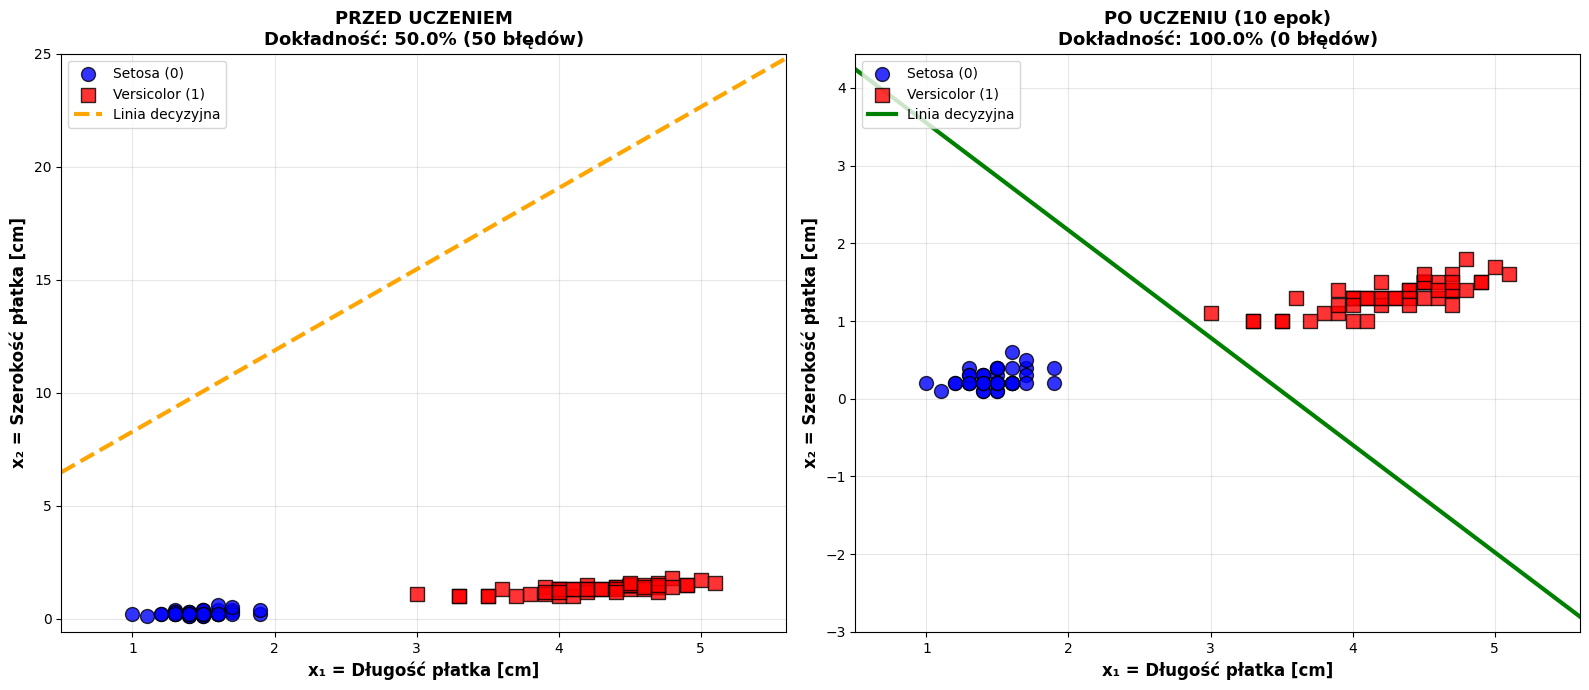

In [45]:
# === PERCEPTRON - PROSTY TRENING (10 epok) + WYKRES PRZED/PO ===

# Losowe wagi początkowe
np.random.seed(42)
w1_initial = np.random.randn()
w2_initial = np.random.randn()
b_initial  = np.random.randn()

print("🎲 PERCEPTRON Z LOSOWYMI WAGAMI (PRZED UCZENIEM)\n")
print("="*70)
print(f"⚖️ Parametry początkowe: w₁={w1_initial:.4f}, w₂={w2_initial:.4f}, b={b_initial:.4f}")

def predict_point(x1, x2, w1, w2, b):
    return 1 if (w1*x1 + w2*x2 + b) >= 0 else 0

# Błędy przed
errors_before = sum(predict_point(X_subset[i,0], X_subset[i,1], w1_initial, w2_initial, b_initial) != y_subset[i] for i in range(len(X_subset)))
accuracy_before = (len(X_subset) - errors_before) / len(X_subset) * 100
print(f"\n🎯 PRZED: błędy={errors_before}/{len(X_subset)}, acc={accuracy_before:.1f}%")

# === Trening (10 epok) ===
w1, w2, b = w1_initial, w2_initial, b_initial
learning_rate = 0.1
max_epochs = 10

for epoch in range(max_epochs):
    updates = 0  # liczba aktualizacji wag w tej epoce (nie = błędy po epoce)
    for i in range(len(X_subset)):
        x1_i, x2_i = X_subset[i]
        y_i = y_subset[i]
        y_hat = predict_point(x1_i, x2_i, w1, w2, b)
        err = y_i - y_hat
        if err != 0:
            w1 += learning_rate * err * x1_i
            w2 += learning_rate * err * x2_i
            b  += learning_rate * err
            updates += 1
    print(f"Epoka {epoch+1:2d}: aktualizacje={updates}")

w1_final, w2_final, b_final = w1, w2, b

# Błędy po
errors_after = sum(predict_point(X_subset[i,0], X_subset[i,1], w1_final, w2_final, b_final) != y_subset[i] for i in range(len(X_subset)))
accuracy_after = (len(X_subset) - errors_after) / len(X_subset) * 100
print(f"\n🎯 PO: błędy={errors_after}/{len(X_subset)}, acc={accuracy_after:.1f}%")

# === Wykres PRZED vs PO ===
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Zakres x oraz punkty
x1_min, x1_max = X_subset[:,0].min()-0.5, X_subset[:,0].max()+0.5
x2_min, x2_max = X_subset[:,1].min()-0.5, X_subset[:,1].max()+0.5
x1_range = np.linspace(x1_min, x1_max, 200)

def plot_panel(ax, title, w1p, w2p, bp, line_color, line_style):
    ax.scatter(X_subset[setosa_mask, 0], X_subset[setosa_mask, 1],
               c='blue', marker='o', s=100, label='Setosa (0)',
               alpha=0.8, edgecolors='black', linewidth=1.0, zorder=3)
    ax.scatter(X_subset[versicolor_mask, 0], X_subset[versicolor_mask, 1],
               c='red', marker='s', s=100, label='Versicolor (1)',
               alpha=0.8, edgecolors='black', linewidth=1.0, zorder=3)
    # Linia decyzyjna
    if abs(w2p) > 1e-12:
        x2_line = -(w1p * x1_range + bp) / w2p
        ax.plot(x1_range, x2_line, color=line_color, linestyle=line_style, linewidth=3, label='Linia decyzyjna', zorder=2)
        # Dopasuj y-limits tak, by widać było i dane i linię
        y_all_min = min(x2_min, x2_line.min()) - 0.2
        y_all_max = max(x2_max, x2_line.max()) + 0.2
        ax.set_ylim(y_all_min, y_all_max)
    else:
        # Linia pionowa
        if abs(w1p) > 1e-12:
            x0 = -bp / w1p
            ax.axvline(x0, color=line_color, linestyle=line_style, linewidth=3, label='Linia decyzyjna', zorder=2)
    ax.set_xlim(x1_min, x1_max)
    ax.set_xlabel('x₁ = Długość płatka [cm]', fontsize=12, fontweight='bold')
    ax.set_ylabel('x₂ = Szerokość płatka [cm]', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=10)

# Panel PRZED
plot_panel(
    axes[0],
    f"PRZED UCZENIEM\nDokładność: {accuracy_before:.1f}% ({errors_before} błędów)",
    w1_initial, w2_initial, b_initial,
    line_color='orange', line_style='--'
)

# Panel PO
plot_panel(
    axes[1],
    f"PO UCZENIU (10 epok)\nDokładność: {accuracy_after:.1f}% ({errors_after} błędów)",
    w1_final, w2_final, b_final,
    line_color='green', line_style='-'
)

plt.tight_layout()
plt.show()

### 🔧 Dobre praktyki: liczba epok i early stopping
- Ustal max_epochs jako górny limit (np. 50–200).
- Stosuj early stopping:
  - Na danych liniowo separowalnych: zatrzymaj, gdy błędy = 0.
  - Na danych nieseparowalnych: ustaw tolerancję (errors ≤ k) lub patience (brak poprawy N epok).
- Tasuj próbki w każdej epoce (opcjonalnie) i ustaw seed dla reprodukowalności.
- Licz błędy po przejściu całego zbioru (metryka z epoki), nie po pojedynczej aktualizacji.

In [46]:
# === SZCZEGÓŁOWY PROCES UCZENIA - PROSTO (10 epok) ===

# Reset wag do wartości początkowych
np.random.seed(42)
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

learning_rate = 0.1
max_epochs = 10

print("\n" + "="*70)
print("🎓 START UCZENIA PERCEPTRONU (10 epok)")
print("="*70)
print(f"⚙️ Parametry: η={learning_rate}, epoki={max_epochs}")

history = {
    'epoch': [], 'errors': [], 'accuracy': [],
    'w1': [w1], 'w2': [w2], 'b': [b],
    'mis_after': []  # liczba błędów po epoce (finalne wagi)
}

for epoch in range(max_epochs):
    epoch_errors = 0  # liczba aktualizacji wag w tej epoce
    updates_count = 0
    for i in range(len(X_subset)):
        x1_i, x2_i = X_subset[i]
        y_i = y_subset[i]
        z = w1*x1_i + w2*x2_i + b
        y_hat = 1 if z >= 0 else 0
        err = y_i - y_hat
        if err != 0:
            w1 += learning_rate * err * x1_i
            w2 += learning_rate * err * x2_i
            b  += learning_rate * err
            epoch_errors += 1
            updates_count += 1

    # Dokładność po epoce (błędy_po_epoce liczone na finalnych wagach z epoki)
    correct = 0
    for i in range(len(X_subset)):
        z = w1*X_subset[i,0] + w2*X_subset[i,1] + b
        y_hat = 1 if z >= 0 else 0
        if y_hat == y_subset[i]:
            correct += 1
    acc = correct / len(X_subset) * 100
    mis_after = len(X_subset) - correct

    history['epoch'].append(epoch+1)
    history['errors'].append(epoch_errors)  # = liczba aktualizacji w epoce
    history['accuracy'].append(acc)
    history['w1'].append(w1)
    history['w2'].append(w2)
    history['b'].append(b)
    history['mis_after'].append(mis_after)

    # Czytelny log: aktualizacje vs błędy_po_epoce
    print(f"Epoka {epoch+1:2d}: aktualizacje={epoch_errors:2d}, błędy_po_epoce={mis_after:2d}, acc={acc:5.1f}%, w₁={w1:.3f}, w₂={w2:.3f}, b={b:.3f}")

print("\n" + "="*70)
print("✅ UCZENIE ZAKOŃCZONE")
print("="*70)


🎓 START UCZENIA PERCEPTRONU (10 epok)
⚙️ Parametry: η=0.1, epoki=10
Epoka  1: aktualizacje= 6, błędy_po_epoce=50, acc= 50.0%, w₁=0.267, w₂=-0.098, b=0.248
Epoka  2: aktualizacje= 4, błędy_po_epoce=50, acc= 50.0%, w₁=0.327, w₂=-0.018, b=0.048
Epoka  3: aktualizacje= 3, błędy_po_epoce=50, acc= 50.0%, w₁=0.517, w₂=0.082, b=-0.052
Epoka  4: aktualizacje= 4, błędy_po_epoce=50, acc= 50.0%, w₁=0.407, w₂=0.132, b=-0.252
Epoka  5: aktualizacje= 2, błędy_po_epoce= 0, acc=100.0%, w₁=0.127, w₂=0.092, b=-0.452
Epoka  6: aktualizacje= 0, błędy_po_epoce= 0, acc=100.0%, w₁=0.127, w₂=0.092, b=-0.452
Epoka  7: aktualizacje= 0, błędy_po_epoce= 0, acc=100.0%, w₁=0.127, w₂=0.092, b=-0.452
Epoka  8: aktualizacje= 0, błędy_po_epoce= 0, acc=100.0%, w₁=0.127, w₂=0.092, b=-0.452
Epoka  9: aktualizacje= 0, błędy_po_epoce= 0, acc=100.0%, w₁=0.127, w₂=0.092, b=-0.452
Epoka 10: aktualizacje= 0, błędy_po_epoce= 0, acc=100.0%, w₁=0.127, w₂=0.092, b=-0.452

✅ UCZENIE ZAKOŃCZONE
